In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Function to download Forex data from Yahoo Finance
def download_fx_data(symbol, start_date, end_date):
    df = yf.download(symbol, start=start_date, end=end_date)
    return df

# Breakout Strategy
def breakout_strategy(data, window=20):
    """
    Simple breakout strategy where we buy when price breaks above the rolling high.
    Args:
    - data: DataFrame with 'High', 'Low', 'Close' prices
    - window: Number of days to calculate the resistance level
    
    Returns:
    - signals: DataFrame with 'Buy' and 'Sell' signals
    """
    data['Rolling_High'] = data['High'].rolling(window=window).max()
    data['Buy_Signal'] = np.where(data['Close'] > data['Rolling_High'].shift(1), 1, 0)
    return data

# Breakdown Strategy
def breakdown_strategy(data, window=20):
    """
    Simple breakdown strategy where we sell when price breaks below the rolling low.
    Args:
    - data: DataFrame with 'High', 'Low', 'Close' prices
    - window: Number of days to calculate the support level
    
    Returns:
    - signals: DataFrame with 'Buy' and 'Sell' signals
    """
    data['Rolling_Low'] = data['Low'].rolling(window=window).min()
    data['Sell_Signal'] = np.where(data['Close'] < data['Rolling_Low'].shift(1), -1, 0)
    return data

# Plot results
def plot_strategy(data, symbol, title):
    plt.figure(figsize=(14, 7))
    
    plt.plot(data['Close'], label='Close Price', alpha=0.5)
    
    # Plot Buy Signals
    plt.plot(data[data['Buy_Signal'] == 1].index, 
             data['Close'][data['Buy_Signal'] == 1], 
             '^', markersize=10, color='g', lw=0, label='Buy Signal')

    # Plot Sell Signals
    plt.plot(data[data['Sell_Signal'] == -1].index, 
             data['Close'][data['Sell_Signal'] == -1], 
             'v', markersize=10, color='r', lw=0, label='Sell Signal')
    
    plt.title(f'{title} for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


[*********************100%%**********************]  1 of 1 completed


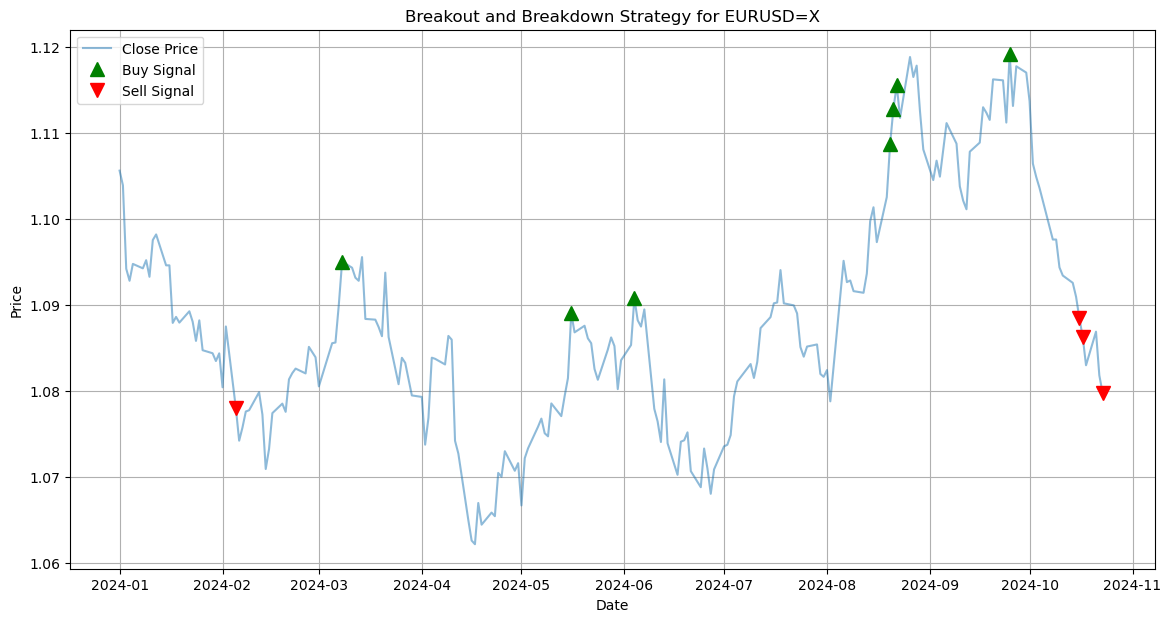

In [7]:

# Example usage
if __name__ == "__main__":
    symbol = 'EURUSD=X'  # Forex symbol for EUR/USD
    start_date = '2024-01-01'
    end_date = '2025-01-01'
    
    # Download Forex Data
    fx_data = download_fx_data(symbol, start_date, end_date)
    
    # Apply Breakout Strategy
    fx_data = breakout_strategy(fx_data)
    
    # Apply Breakdown Strategy
    fx_data = breakdown_strategy(fx_data)
    
    # Plot the strategy
    plot_strategy(fx_data, symbol, 'Breakout and Breakdown Strategy')
